# Protein Synthesis Simulation

Load dataset:

In [1]:
from HumanGenomeDataset.load_dataset import load_dataset

data_df = load_dataset('dna_protein_coding_sequences')
data_df.head(2)

c:\Users\giuli\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,ID,sequence,category
0,NM_001368254.1,GCTGAGCTGAGCTGGGGCGCAGCCGCCTGTCTGCACCGGCAGCACC...,NM
1,NM_001350977.1,TCCACAACTGAAACATCCACTTCTGAACACCATGTCCTACTACAGC...,NM


### Simulation

In [2]:
from src.simulation import ProteinSinthesisProcess

In [3]:
import random
random.seed(42)

In [4]:
SIM_TIME = 3600*3 # 3 hours
NUMBER_RESOURCES = 20
NUMBER_RNA_POLYMERASES = 10
NUMBER_RIBOSOMES = 3
URACIL_INITIAL_AMOUNT = random.randint(3e+4, 5e+4)
ADENINE_INITIAL_AMOUNT = random.randint(3e+4, 5e+4)
GUANINE_INITIAL_AMOUNT = random.randint(3e+4, 5e+4)
CYTOSINE_INITIAL_AMOUNT = random.randint(3e+4, 5e+4)
RANDOM_SEED = 42

In [5]:
protein_synthesis_process = ProteinSinthesisProcess(
    dna_sequences_df=data_df,
    number_resources=NUMBER_RESOURCES,
    number_rna_polymerases=NUMBER_RNA_POLYMERASES, 
    number_ribosomes=NUMBER_RIBOSOMES,
    uracil_initial_amount=URACIL_INITIAL_AMOUNT,
    adenine_initial_amount=ADENINE_INITIAL_AMOUNT,
    guanine_initial_amount=GUANINE_INITIAL_AMOUNT,
    cytosine_initial_amount=CYTOSINE_INITIAL_AMOUNT,
    random_seed=RANDOM_SEED,
    verbose=False
    )

Simulation environment initialized, time unit: 0.0001 second.


In [6]:
print(protein_synthesis_process)

Protein Sinthesis Process:
185310 dna sequences to synthesize,
20 resources available,
10 RNA polymerases,
3 ribosomes,
33648 uracil bases,
30819 adenine bases,
39012 guanine bases,
38024 cytosine bases.


Start simulation:

In [7]:
protein_synthesis_process.run(simulation_time=SIM_TIME) # run the simulation, 286 proteins synthesized from 142 DNA sequences.

Simulation started
End simulation: 62 proteins synthesized from 36 DNA sequences.


In [8]:
protein_synthesis_process.save_process() # save the process

Process saved.


### Results

In [9]:
import pandas as pd
results_path = 'results/results.csv'

results_df = pd.read_csv(results_path, index_col=0)

In [10]:
print('Number of DNA sequence traslated:', results_df[results_df['mrna_sequences'].notna()].shape[0])
print('Number of DNA sequence not traslated:', results_df[results_df['protein_synthesized']==False].shape[0])

Number of DNA sequence traslated: 34
Number of DNA sequence not traslated: 2


In [11]:
results_df[results_df['mrna_sequences'].notna()][[
    'polypeptides_chains', 'number_of_proteins_synthesized', 'length_proteins', 'number_different_proteins']]

,polypeptides_chains,number_of_proteins_synthesized,length_proteins,number_different_proteins
6911,['NH2-SRSVAHRRMAAWKPPRGPKGEPRGDSSGHKGARPKPRFPR...,1,[117],1.0
7339,"['NH2-DREKKKDEKNEKEDEKHQ-COOH', 'NH2-DREKKKDEK...",2,"[18, 18]",1.0
8495,['NH2-PPTPGPTAWDPPSRTTRMWTSFTGPSVVGATPRSSGADLL...,1,[106],1.0
12155,"['NH2-RRTRSRLAKR-COOH', 'NH2-RRTRSRLAKR-COOH']",2,"[10, 10]",1.0
15206,['NH2-S-COOH'],1,[1],1.0
16420,"['NH2-TIFRGTKHCRSPSNVLGD-COOH', 'NH2-TIFRGTKHC...",2,"[18, 18]",1.0
16969,"['NH2-TIFRGTKHCRSPSNVLGD-COOH', 'NH2-TIFRGTKHC...",2,"[18, 18]",1.0
28516,"[None, None, None, None]",4,[],0.0
31778,['NH2-RLELNSEGRCVGDVRSGVGTIRAAHPALISKRLGQTPLPT...,1,[54],1.0
44788,['NH2-TLVREGTRPACRSASKPVQFR-COOH'],1,[21],1.0


In [12]:
results_df.columns

Index(['ID', 'category', 'end_process_time', 'end_translation_time',
       'length_proteins', 'mrna_sequences', 'number_different_proteins',
       'number_of_proteins_synthesized', 'polypeptides_chains',
       'polypeptides_chains_ext', 'protein_synthesized',
       'request_start_process_time', 'sequence', 'start_process_time',
       'start_transcription_time', 'start_translation_time'],
      dtype='object')

In [13]:
results_df[results_df['mrna_sequences'].notna()][[
    '', '', 'length_proteins', 'number_different_proteins']].describe()

KeyError: "[''] not in index"

### Protein Length

In [ ]:
from src.utils.plot_utils import *

In [ ]:
results_df = pd.read_csv('results/results.csv', index_col=0)

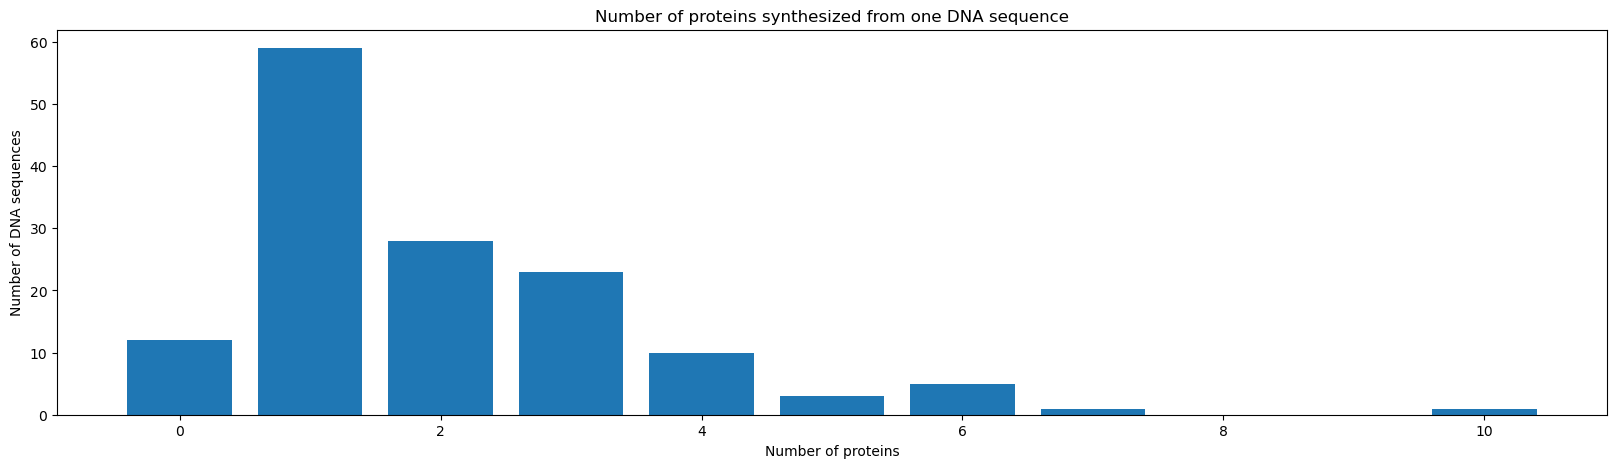

In [ ]:
barplot_proteins_number(results_df)

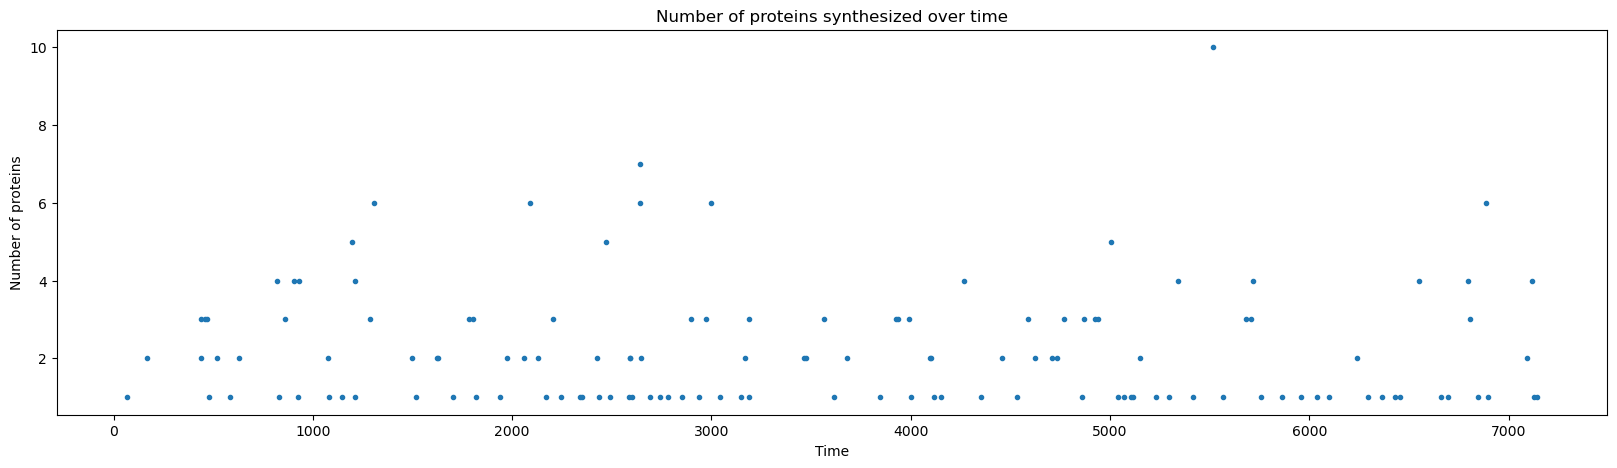

In [ ]:
plot_proteins_number_over_time(results_df)

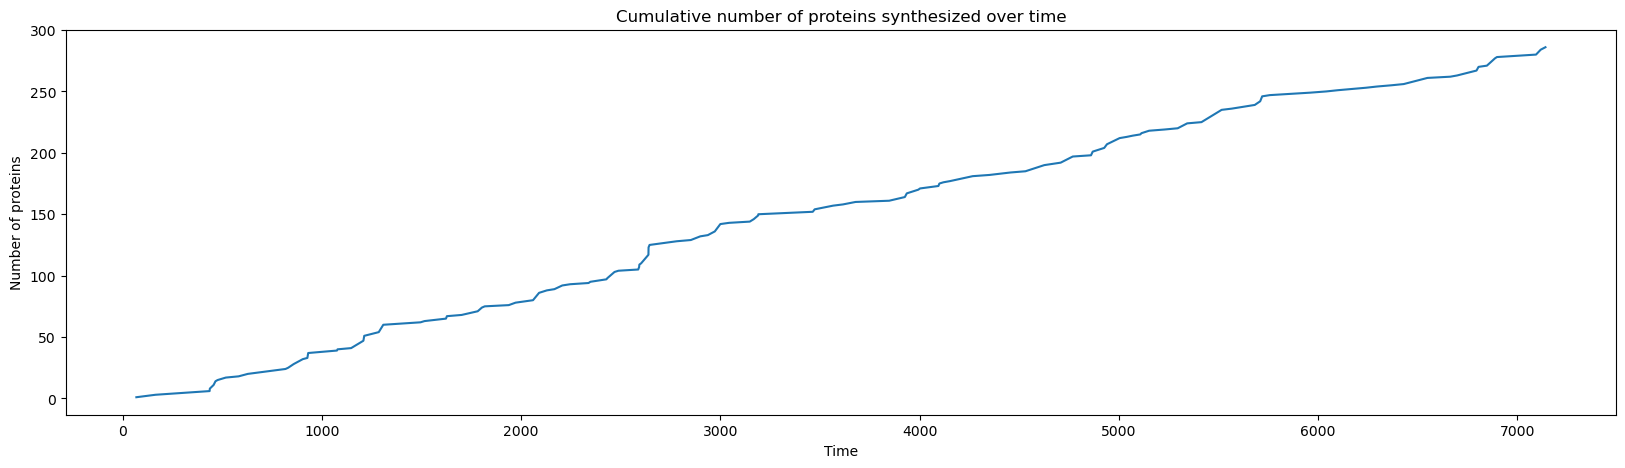

In [ ]:
plot_cumulative_proteins_number_over_time(results_df)

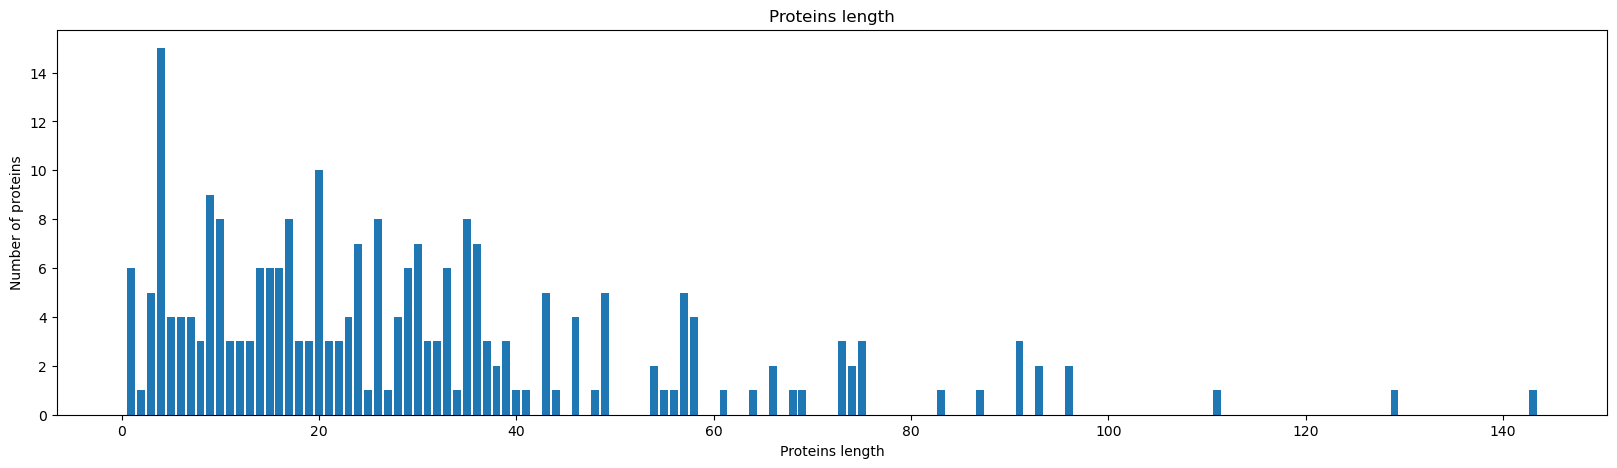

In [ ]:
barplot_proteins_length(results_df)

### Nucleotides Level

In [ ]:
import json

with open('results/nucleotides_history_uracil.json') as f:
    uracil_dict = json.load(f)

with open('results/nucleotides_history_adenine.json') as f:
    adenine_dict = json.load(f)

with open('results/nucleotides_history_guanine.json') as f:
    guanine_dict = json.load(f)

with open('results/nucleotides_history_cytosine.json') as f:
    cytosine_dict = json.load(f)

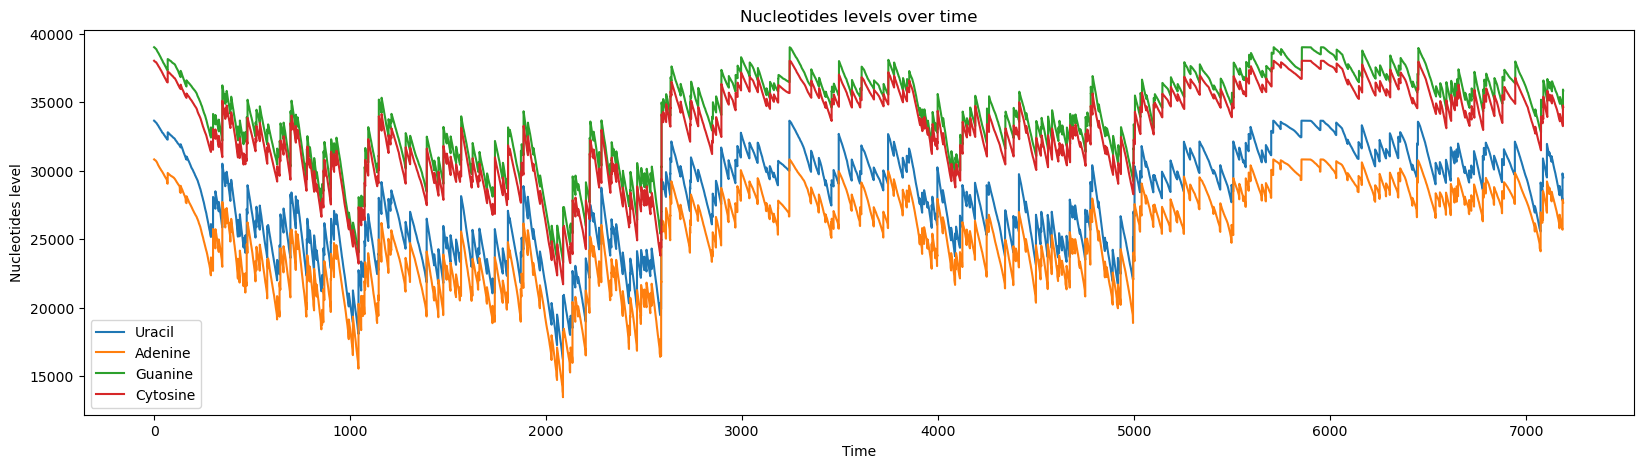

In [ ]:
plot_nucleotide_level_over_time(
    uracil_dict, adenine_dict, guanine_dict, cytosine_dict)

In [ ]:
"""
barplot_nucleotide_level_over_time(
    uracil_dict, adenine_dict, guanine_dict, cytosine_dict, time_unit=1)
"""

'\nbarplot_nucleotide_level_over_time(\n    uracil_dict, adenine_dict, guanine_dict, cytosine_dict, time_unit=1)\n'

### RNA Polymerase

In [ ]:
with open('results/rna_polymerase_history.json') as f:
    rna_polymerase_dict = json.load(f)

In [ ]:
rna_polymerase_df = dict_to_dataframe(rna_polymerase_dict)

In [ ]:
rna_polymerase_df.describe() # values in seconds

,queue,request_time,available_time,wait_time,end_time,usage_time
count,290.0,290.000000,290.000000,290.0,290.000000,290.000000
mean,0.0,3225.776686,3225.776686,0.0,3344.589022,21.333346
std,0.0,2058.227682,2058.227682,0.0,2046.651479,18.047519
min,0.0,0.000000,0.000000,0.0,66.953100,0.105000
25%,0.0,1437.166325,1437.166325,0.0,1582.407925,7.675475
50%,0.0,2988.916000,2988.916000,0.0,3106.718550,17.006300
75%,0.0,4785.703275,4785.703275,0.0,4915.609350,30.974100
max,0.0,7096.460100,7096.460100,0.0,7190.091400,110.340000


### Ribosome

In [ ]:
with open('results/ribosome_history.json') as f:
    ribosome_dict = json.load(f)

In [ ]:
ribosome_df = dict_to_dataframe(ribosome_dict)

In [ ]:
ribosome_df.describe()

,queue,request_time,available_time,wait_time,end_time,usage_time
count,290.0,290.000000,290.000000,290.0,290.000000,290.000000
mean,0.0,3344.589022,3344.589022,0.0,3345.952298,1.318711
std,0.0,2046.651479,2046.651479,0.0,2046.681528,1.209426
min,0.0,66.953100,66.953100,0.0,69.353100,0.000000
25%,0.0,1582.407925,1582.407925,0.0,1582.732925,0.450000
50%,0.0,3106.718550,3106.718550,0.0,3107.893550,1.000000
75%,0.0,4915.609350,4915.609350,0.0,4919.734350,1.750000
max,0.0,7190.091400,7190.091400,0.0,7196.441400,7.150000


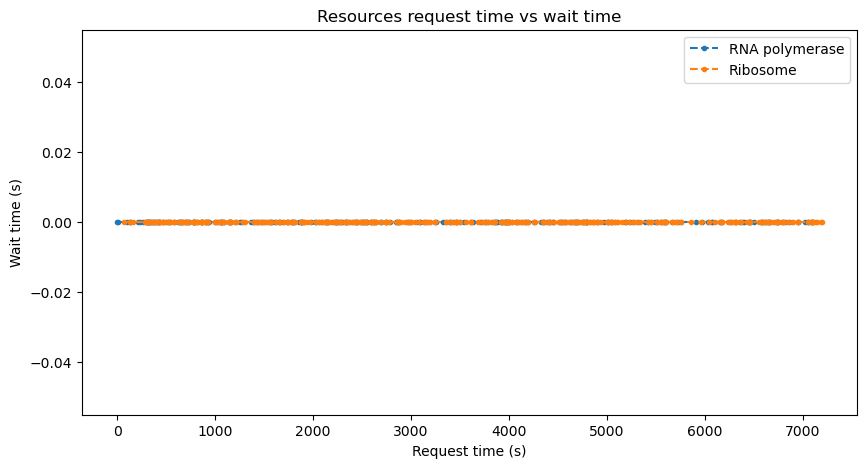

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(rna_polymerase_df['request_time'], rna_polymerase_df['wait_time'], label='RNA polymerase')
plt.plot(ribosome_df['request_time'], ribosome_df['wait_time'], label='Ribosome')
plt.title('Resources request time vs wait time')
plt.xlabel('Request time (s)')
plt.ylabel('Wait time (s)')
plt.legend()
plt.show()